<a href="https://colab.research.google.com/github/JuliaPenalva/Meus-Projetos/blob/main/Analisando_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *New York*

## 1. Introdução
### 1.1. Airbnb
O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade** e o mais incrível é que ele **não possui nenhuma hospedagem**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No começo de 2019, a Startup fundada 10 anos atrás, já havia **hospedado mais de 500 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

<center><img alt="Analisando Airbnb" width="30%" src="https://a0.muscache.com/im/pictures/5abcc13e-d206-414c-9c8b-e84d1b649aeb.jpg"></center>

### 1.2. Nova Iorque

<center><img width = "100%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b1/26_-_New_York_-_Octobre_2008.jpg/1200px-26_-_New_York_-_Octobre_2008.jpg"></center>

A cidade de Nova Iorque está localizada no estado de Nova Iorque, na costa leste dos Estados Unidos, e é a cidade mais populosa do país. A cidade é considerada um polo **mundial** de finanças, arte, comércio, moda, pesquisa, tecnologia, educação e entretenimento. 

De acordo com o [NYCdata](https://www.baruch.cuny.edu/nycdata/tourism/index.html), em 2018, Nova Iorque recebeu 65,1 milhões de visitantes, dos quais 13,6 milhões vieram de outros países. Além disso, sozinha a cidade atrai mais de um terço dos turistas internacionais do país. 


## 2. Contextualização e Objetivo

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*. 

Nesse projeto foi utilizada a [base de dados](http://data.insideairbnb.com/united-states/ny/new-york-city/2021-02-04/visualisations/listings.csv) referente a cidade de Nova Iorque com data base de 04 de fevereiro de 2021. 

Utilizando a ferramenta Colaboratory, neste trabalho, iremos fazer uma análise exploratória dos dados referentes à cidade de Nova Iorque, e ver quais insights podem ser extraídos a partir de dados brutos.

Nos próximos capítulos serão contextualizados os dados e o tratamento que está sendo feito com eles, apresentando o mínimo possível de linhas de códigos para que fique uma leitura mais fácil e menos técnica. Todavia, todos os códigos utilizados nessa análise serão disponbilizados no Anexo 1, ao fim do trabalho.

## 3. Dados

A amostra contém **37.012** hospedagens, que são categorizadas nas **16** colunas descritas abaixo.

**Dicionário das variáveis**

* **id**: número de quatro dígitos que identifica o imóvel. 

* **name**: nome do imóvel dado pelo anfitrião.
* **host_id**: número de quatro dígitos que identifica o anfitrião. 
* **host_name**: nome do anfitrião.
* **neighbourhood_group**: burgo onde o imóvel é localizado. 
* **neighbourhood**: bairro onde o imóvel é localizado. 
* **latitude**: latitude geográfica do imóvel. 
* **longitude**: longitude geográfica do imóvel. 
* **room_type**: tipo de hospedagem.
* **price**: preço da diária da hospedagem, em dólares.
* **minimum_nights**: quantidade mínima de noites para alugar a hospedagem.
* **number_of_reviews**: quantidade de avaliações de hospedes anteriores.
* **last_review**: data da avaliação do último hospede. 
* **reviews_per_month**: quantidade média de avaliações mensais do imóvel.
* **calculated_host_listings_count**: quantidade de hospedes total da hospedagem.
* **availability_365**: quantidade de dias do ano em que a hospedagem está disponível.

Abaixo as três primeiras linhas da amostra para exemplificar os valores das variáveis:





In [ ]:
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,100,30,48,2019-11-04,0.35,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,73,1,386,2021-01-27,4.99,1,249
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.35,1,365


Depois de analisar as colunas e o tamanho da base de dados, os próximos passos são a identificação dos tipos de variáveis e ver a quantidade de valores ausentes. 

In [ ]:
display(data.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
(data.isnull().sum() / data.shape[0]).sort_values(ascending = False)

reviews_per_month                 0.257295
last_review                       0.257295
host_name                         0.000486
name                              0.000351
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Foi possível identificar que os tipos das variáveis estão pertinentes para nossa análise, não temos, por exemplo, nenhuma coluna numérica como *string*. 
Em relação a dados faltantes, as colunas com o maior percentual de dados vazios foram as de avaliações por mês e data da última avaliação. A princípio, como a idéia dessa análise é focar em outros dados, não vamos fazer nenhuma alteração nas colunas. 

Dentro das variáveis que nós temos, as numéricas são: 

* id
* host_id
*latitude
*longitude
*price
*minimum_nights
*number_of_reviews
*reviews_per_month
*calculated_host_listings_count
*availability_365

Desse grupo, foi decidido analisanr inicialmente o preço e o número mínimo de noites. Por conta disso, nosso próximo passo será analisar a distribuição dessas variáveis.

### 3.1. Variáveis Preço e Noites Mínimas

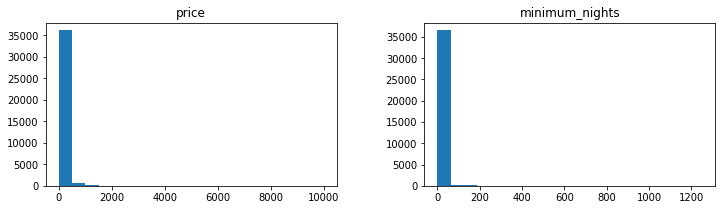

In [ ]:
data[['price','minimum_nights']].hist(bins = 20, grid = False, figsize=(12,3));

Por conta da escala dos gráficos, não foi possível ter nenhum tipo de *insight* sobre a distribuição das variáveis, portanto será feito uma análise de alguns indicadores estatísticos de ambas a seguir.

In [ ]:
data[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,37012.000000,37012.000000
mean,142.842240,23.323679
std,275.740987,26.441255
min,0.000000,1.000000
25%,60.000000,4.000000
50%,99.000000,30.000000
75%,151.000000,30.000000
max,10000.000000,1250.000000


Acima temos informações de média, desvio-padrão, valores mínimos e máximos de cada uma das variáveis. 

Na variável preço, podemos observar algumas informações que não parecem coerentes, como o preço mínimo ser zero. Afinal, quem cobraria aluguel zero de um inquilino? Outro ponto interessante é observar que a média é de **142,8** dólares e **75%** da amostra está abaixo de **151** dólares, porém o valor máximo é de **10 mil dólares**, bem distante do que podemos observar majoritariamente na amostra dos preços. Claramente trata-se de um *outlier*, portanto teremos que fazer o tratamento dessa coluna para que os valores façam sentido dentro da realidade da amostra. 

Mas antes disso, temos que observar também a variável de mínimo de noites. O valor mínimo de uma noite faz sentido, porém o máximo de **1.250** não parece fazer sentido. Afinal, quem somente alugaria um imóvel caso o inquilino se hospedasse por 1.250 noites (aproximadamente **3,4 anos**)? É possível observar que **75%** da amostra tem um mínimo de 30 noites, portanto conseguimos identificar a existência de outliers* que devem ser tratados nessa coluna.

Dessa forma, faremos o tratamento de ambas variáveis a fim de ter valores mais fidedignos.



In [ ]:
data_clean = data.copy()
data_clean.drop(data_clean[data_clean.price > 250].index, axis = 0, inplace=True)
data_clean.drop(data_clean[data_clean.minimum_nights > 31].index, axis = 0, inplace=  True)
data_clean[['price','minimum_nights']].describe()

,price,minimum_nights
count,33011.000000,33011.000000
mean,102.106449,21.127109
std,55.262006,12.715350
min,0.000000,1.000000
25%,59.000000,4.000000
50%,90.000000,30.000000
75%,136.000000,30.000000
max,250.000000,31.000000


Por fim, foram estabelecidos os seguintes limites superiores: 
* **Preço:** 250 dólares
* **Noites mínimas:** 31 noites

Dessa forma, excluímos da amostra de preço o equivalente a 10,38% da amostra inicial e 3,16% da amostra de noites mínimas. É importante ressaltar que, mesmo que a amostra esteja menor do que a obtida inicialmente, a amostra ajustada é mais precisa na hora de trabalharmos com correlações.

Abaixo são apresentadas as distribuições das variáveis depois do tratamento:

100    0.039926
150    0.037927
50     0.035140
60     0.028839
75     0.027415
Name: price, dtype: float64

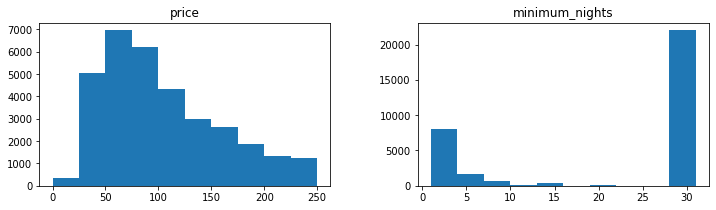

In [ ]:
data_clean[['price','minimum_nights']].hist(bins = 10, grid = False, figsize=(12,3));
(data_clean.minimum_nights.value_counts() / data_clean.shape[0])[:5];
data_clean['price'].value_counts(ascending = False)[:5]/data_clean.shape[0]

Um ponto de atenção é o fato da distribuição das noites mínimas estar concentrada no ponto de 30 noites, aproximadamente 65,25% da amostra está nesse ponto. Uma análise possível de realizar é analisar se isso é concentrado em uma região ou se é um padrão em toda a cidade. 

Abaixo um mapa *scatterplot* cuja legenda indica as noites mínimas de estadia na hospedagem: 



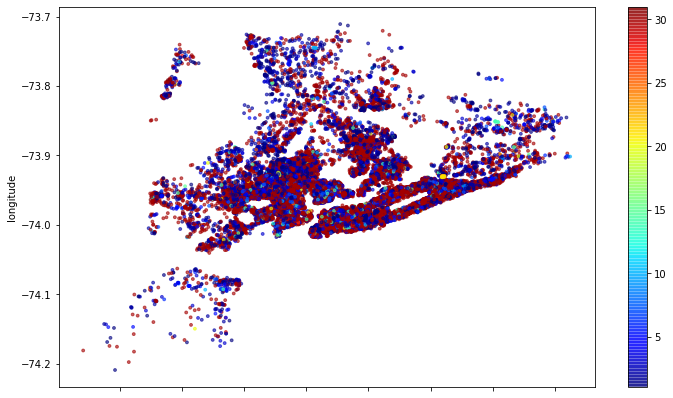

In [58]:
data_clean.plot(kind = "scatter", x='latitude', y='longitude', alpha =0.6, c=data_clean['minimum_nights'], 
                s=8, cmap=plt.get_cmap('jet'), figsize=(12,7));

Aparentemente não existe nenhuma relação entre o burgo e a quantidade mínima de noites, dado que a exigência de 30 noites parece ser distribuida igualmente em todo o território da cidade. 

Enquanto isso, o preço tem uma distribuição mais homogênea, mesmo que ligeiramente concentrada à esquerda do gráfico. Para fins de exemplificação, abaixo seguem os cinco principais valores do preço e seu percentual na amostra:
* Price = 100 (39,9%)
* Price = 150 (37,9%)
* Price = 50 (35,1%)
* Price = 60 (28,8%)
* Price = 75 (27,4%)


No próximo tópico vamos tratar da varíavel de burgo, correspondente a localização da hospedagem.

###3.2. Variável de Burgo

A variável *neighbourhood_group* nos dá a informação de em que burgo (ou macro região, zona, etc) em que cada hospedagem está localizada. A variável é uma *string*, desta forma primeiramente vamos analisar os valores que ela pode tomar. Em seguida vamos tentar analisar a relação que ela tem com as variáveis numéricas analisadas no tópico anterior. 

In [ ]:
print(data_clean.neighbourhood_group.value_counts());

print(data_clean.neighbourhood_group.value_counts()/data_clean.shape[0]);

Manhattan        13914
Brooklyn         13413
Queens            4471
Bronx              940
Staten Island      273
Name: neighbourhood_group, dtype: int64
Manhattan        0.421496
Brooklyn         0.406319
Queens           0.135440
Bronx            0.028475
Staten Island    0.008270
Name: neighbourhood_group, dtype: float64


Identificamos cinco valores que a variável de burgo pode tomar e seus percentuais dentro da amostra :
* Manhattan (42,1%)
* Brooklyn (40,6%)
* Queens (13,5%)
* Bronx (2,8%)
*State Island (0,083%)

O próximo passo será criar duas novas colunas, uma para Manhattan e outra para o Brookly. Nessas colunas os valores serão **um ou zero**, sendo 1 caso a hospedagem esteja localizada no bairro da nova coluna e zero caso contrário. 

Calculando a correção entre os bairros e o preço da diária da hospedagem chegamos ao seguinte resultado:
* Correlação entre Manhattan x Preço = **0,2382**
* Correlação entre Brooklyn x Preço = **-0,0905**

Dessa forma, percebemos que existe uma correlação fraca entre a hospedagem estar localizada em Manhattan e o preço da diária. Já em relação ao Brooklyn, a correlação foi praticamente nula entre o preço da diária e a hospedagem estar localizada nesse bairro.  

Outra possível maneira de analisar as diferenças de preços entre os bairros é encontrar a média de preço de cada um deles. Abaixo os resultados: 


In [62]:
data_clean.groupby(['neighbourhood_group']).price.mean().sort_values()

neighbourhood_group
Bronx             77.688298
Queens            78.271751
Staten Island     87.615385
Brooklyn          96.056885
Manhattan        117.530976
Name: price, dtype: float64

Dessa forma, podemos perceber que mesmo que a correlação entre os bairros e o preço não deixe clara a relação, sabemos que, em média, o preço de uma hospedagem em Manhattan é maior do que a média das demais localizações. Enquanto isso, em média, a diária mais barata pode ser encontrada no Bronx. 


## 3.3. Variável de Tipo de Hospedagem

A variável *room_type* sinaliza qual tipo de acomodação do anúncio. Vamos analisar essa variável vendo quais valores ela pode assumir e como ela se relaciona com outras variáveis.  


In [ ]:
data_clean['room_type'].value_counts()
data_clean.room_type.value_counts() / data_clean.shape[0]


Entire home/apt    0.487959
Private room       0.486383
Shared room        0.019569
Hotel room         0.006089
Name: room_type, dtype: float64

Abaixo os tipos de acomodação e o percentual que elas representam da amostra, sendo elas:
* Apartamento/Casa Inteira (48,79%)
* Quarto Privado (48,63%)
* Quarto Compartilhado (1,95%)
* Quarto de Hotel (0,60%)

A amostra é praticamente dividida entre a locação de quartos privados ou casas e apartamentos inteiros, portanto vamos focar a análise nesses tipos de hospedagem. Assim como foi feito com a variável de burgo, vamos criar duas colunas, uma para apartamento ou casa inteira e outra para quarto privado, cujos valores serão 0 ou 1. 

Calculando a correlação entre o tipo de hospedagem e o preço da diária temos os seguintes resultados: 
* Correlação entre Apartamento/Casa Inteira e Preço = **0,5883**
* Correlação entre Quarto Privado e Preço = **-0,5605** 

A correlação nesse caso foi mais forte, indicando uma tendência de que apartamentos inteiros tenham um preço maior do que quartos privados, o que faz sentido dado que alugar um imóvel inteiro é geralmente mais caro do que alugar um quarto. 

Em relação a média dos preços de cada um dos tipos de hospedagem temos o seguinte resultado:


In [68]:
data_clean.groupby(['room_type']).price.mean().sort_values(ascending= False)


room_type
Entire home/apt    135.409921
Hotel room         111.825871
Private room        70.274788
Shared room         59.820433
Name: price, dtype: float64

Dessa forma, podemos afirmar que, em média, apartamentos/casas inteiras tem as maiores diárias enquanto o valor médio dos quartos compartilhados são os menores. 

# 4. Conclusão
Nesse projeto fizemos a análise da base de dados disponibilizada pelo Airbnb, relativa às hospedagens na cidade de Nova Iorque. 
Fizemos a análise de alguns dados e tentamos estabelecer algumas relações entre as variáveis disponíveis. Os principais resultados do projeto são: 

* O preço médio de um Airbnb na cidade de Nova Iorque é de **102,1 dólares**;
* **65,25%** das hospedagens na cidade exigem uma permanência mínima de 30 dias; 
* **42,1%** das hospedagens estão no burgo de Manhattan e **40,6%** estão no Brooklyn;
* O preço de uma hospedagem em Manhattan é, em média, **21,8%** mais cara do que uma hospedagem em outros bairros;
* O preço de uma hospedagem no Brooklyn é, em média, **10,6%** mais barata do que uma hospedagem em outros bairros;
* Alugar um apartamento/casa inteira é, em média, **65,13** dólares mais caro do que alugar somente um quarto privado. O valor é equivalente a um custo adicional de **92,68%** na diária. 

Scatterplot das hospedagens em Nova Iorque, os valores ao lado correspondem ao preço da diária.


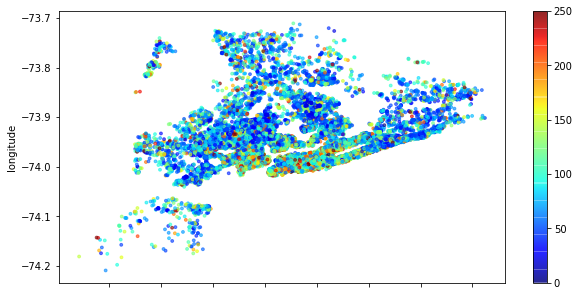

In [69]:
data_clean.plot(kind = "scatter", x='latitude', y='longitude', alpha =0.6, c=data_clean['price'], 
                s=8, cmap=plt.get_cmap('jet'), figsize=(10,5));
print("Scatterplot das hospedagens em Nova Iorque, os valores ao lado correspondem ao preço da diária.")

## ANEXO 1 - Código

Quantidade de Hospedagens: 37012
Categorias das Hospedagens 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

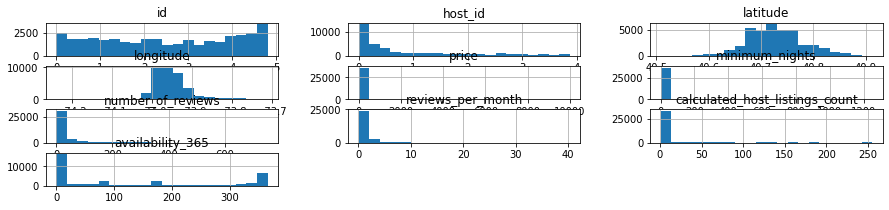

Preço ('price') acima de 250:
3288 entradas
8.8836%
Quantidade mínima de noites acima de 31:
1170 entradas
2.1507%
Manhattan        13914
Brooklyn         13413
Queens            4471
Bronx              940
Staten Island      273
Name: neighbourhood_group, dtype: int64
Manhattan        0.421496
Brooklyn         0.406319
Queens           0.135440
Bronx            0.028475
Staten Island    0.008270
Name: neighbourhood_group, dtype: float64


,Manhattan,Brooklyn,price
Manhattan,1.000000,-0.706156,0.238251
Brooklyn,-0.706156,1.000000,-0.090565
price,0.238251,-0.090565,1.000000


,Manhattan,Brooklyn,minimum_nights
Manhattan,1.000000,-0.706156,0.094609
Brooklyn,-0.706156,1.000000,-0.013480
minimum_nights,0.094609,-0.013480,1.000000


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.036929,-0.017390,-0.060091,-0.036500,-0.005852
minimum_nights,0.036929,1.000000,-0.252503,-0.393506,0.127642,-0.141911
number_of_reviews,-0.017390,-0.252503,1.000000,0.682961,-0.105361,0.161433
reviews_per_month,-0.060091,-0.393506,0.682961,1.000000,-0.048501,0.190596
calculated_host_listings_count,-0.036500,0.127642,-0.105361,-0.048501,1.000000,0.200810
availability_365,-0.005852,-0.141911,0.161433,0.190596,0.200810,1.000000


,whole_apt,private_room,price
whole_apt,1.000000,-0.949967,0.588313
private_room,-0.949967,1.000000,-0.560543
price,0.588313,-0.560543,1.000000


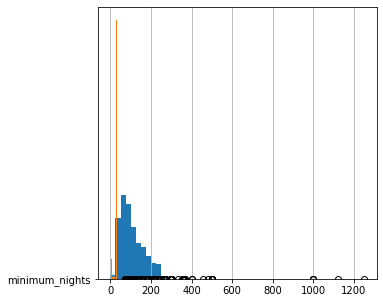

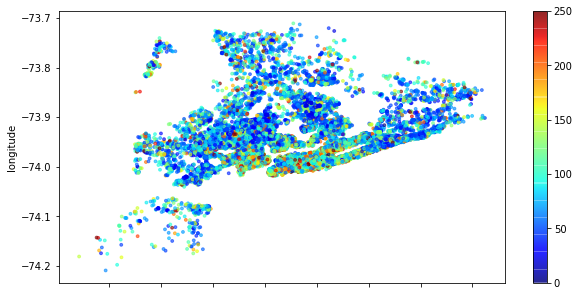

In [33]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importar o arquivo listings.csv para um DataFrame e olhar as primeiras linhas
data = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-02-04/visualisations/listings.csv")
data.head(3)

# analisando quantidade de colunas, linhas e o tipo de cada variável
print("Quantidade de Hospedagens:", data.shape[0])
print("Categorias das Hospedagens", data.shape[1])

display(data.dtypes)

# verpercentua de  valores ausentes de cada variável
(data.isnull().sum() / data.shape[0]).sort_values(ascending = False)

# plotar o histograma das variáveis numéricas
data.hist(bins = 20, figsize =(20,10) );

#resumo estatístico das variáveis numéricas relevantes

data[['price','minimum_nights','calculated_host_listings_count','availability_365']].describe()

# Limpeza de dados outliers das colunas price e minimum_nights
## distribuição de price
data.price.plot(kind = 'box', vert = False, figsize=(15,3));
plt.show()

## ver quantidade com price maior do que 250
print("Preço ('price') acima de 250:")
print("{} entradas".format(len(data[data.price > 250])))
print("{:.4f}%".format((len(data[data.price > 250]) / data.shape[0])*100))

## distribuição de minimum_nights 
data.minimum_nights.plot(kind = 'box', vert = False, figsize = (15,3));

## ver quantidade de hospedagens com noites maiores que 31
print("Quantidade mínima de noites acima de 31:")
print("{} entradas".format(len(data[data.minimum_nights >=31])))
print("{:.4f}%".format((len(data[data.minimum_nights > 31])/data.shape[0])*100))


##observando os limites das variáveis, vamos excluir os valores acima dos limites superiores estabelecidos
##price
data_clean = data.copy()
data_clean.drop(data_clean[data_clean.price > 250].index, axis = 0, inplace=True)
data_clean['price'].describe()
data_clean['price'].hist(bins = 10, figsize = (10,5));
##minimum_nights
data_clean.drop(data_clean[data_clean.minimum_nights > 31].index, axis =0,  inplace = True)
data_clean['minimum_nights'].value_counts(ascending = False)[:3]
data_clean['minimum_nights'].describe()
#data_clean.minimum_nights.plot(kind = 'box', vert = False, figsize=(15,10));
data_clean['minimum_nights'].hist(bins = 10, figsize = (5,5));

#análise variável de burgo 
print(data_clean.neighbourhood_group.value_counts());
print(data_clean.neighbourhood_group.value_counts()/data_clean.shape[0]);

#novas colunas Manhattan e Brooklyn
data_clean['Manhattan'] = data_clean.neighbourhood_group.apply(lambda x: 1 if x =="Manhattan" else 0)
data_clean['Brooklyn'] = data_clean.neighbourhood_group.apply( lambda x: 1 if x =="Brooklyn" else 0)


neigh_price = data_clean[['Manhattan', 'Brooklyn', 'price']].corr()
neigh_nights = data_clean[['Manhattan', 'Brooklyn', 'minimum_nights']].corr()
display(neigh_price)
display(neigh_nights)

#média de preços dos burgos 
data_clean.groupby(['neighbourhood_group']).price.mean().sort_values()
data_clean.groupby(['Manhattan']).price.mean().sort_values()
data_clean.groupby(['Brooklyn']).price.mean().sort_values()


# criar uma matriz de correlação
corr = data_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                   'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

# mostrar a quantidade de cada tipo de imóvel disponível
data_clean['room_type'].value_counts()
data_clean.room_type.value_counts() / data_clean.shape[0]

data_clean['whole_apt'] = data_clean.room_type.apply(lambda x: 1 if x == "Entire home/apt" else 0)
data_clean['private_room'] = data_clean.room_type.apply(lambda x: 1 if x == "Private room" else 0)

room_price = data_clean[['whole_apt', 'private_room', 'price']].corr()
display(room_price)

# ver preços por bairros, na média
#data_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)[:10]
#print(data_clean[data_clean.neighbourhood == "Lighthouse Hill"].shape)
#data_clean[data_clean.neighbourhood == "Lighthouse Hill"]

#print(data_clean[data_clean.neighbourhood == "Belle Harbor"].shape)
#data_clean[data_clean.neighbourhood == "Belle Harbor"]

# plotar os imóveis pela latitude-longitude
data_clean.plot(kind = "scatter", x='latitude', y='longitude', alpha =0.6, c=data_clean['price'], 
                s=8, cmap=plt.get_cmap('jet'), figsize=(10,5));

